# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 1: Using Git and Python for Collaborative Coding in Google Colab*

## Preliminary: Certificate of Work
### (5 Marks)

*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Rushad | Rakhimov | Rushad Rakhimov, September 24, 2024 | 5 | 25% |
| Member 2: | Milena | Ljusic | Milena Ljusic, September 24, 2024| 5 | 25% |
| Member 3: | Priya | Bosman | Priya Bosman, September 24, 2024 | 5 | 25% |
| Member 4: | Syem | Imtiaz | Syem Imtiaz, September 24, 2024 | 5 | 25% |

## Part 1: Printing to the Console
### (6 Marks)

In [1]:
# In the space below, please print "Hello, World! Welcome to the Student Gradebook Management System."
# (1 mark)
print("Hello, World! Welcome to the Student Gradebook Management System.")

Hello, World! Welcome to the Student Gradebook Management System.


In [2]:
# Fill in your information using the defined variables below:
# (1 mark)
lab_group_number = 4
intake_year = 2024
intake_semester = "Fall"

# Using f-strings and the variables above, print "This is implemented by Group <lab_group_number>, for ENGG680 <intake_semester> of <intake_year>"
# (2 marks)
print(f"This is implemented by Group {lab_group_number}, for ENGG680 {intake_semester} of {intake_year}")

This is implemented by Group 4, for ENGG680 Fall of 2024


In [3]:
# Use indexing to print "The subjects involved in this grading system is English and Math." using "subjects" below.
# (2 marks)
subjects = ("English", "Math")

print(f"The subjects involved in this grading system is {subjects[0]} and {subjects[1]}.")

The subjects involved in this grading system is English and Math.


In [4]:
# mounting Google Drive to access csv files
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Part 2: Using Pandas for Data Management and Analytics
### (20 marks)

In [5]:
# In the space below, please import the Pandas library
# (1 mark)
import pandas as pd

In [6]:
# Load the student grade CSV files into DataFrames using the defined variables
# (2 marks)
df_english = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_English.csv')
df_math = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentGrades_Math.csv')

In [7]:
# Merging the DataFrames on 'studentID'
df_studentGrades = pd.merge(df_english, df_math, on='studentID', suffixes=('_English', '_Math'))

In [8]:
# Take a look at the data contained in the csv files. Why is studentID chosen as the key?
# (1 mark)
# StudentID is completely unique to each student, whereas there is the potential that there be repetition within the last/first names.

In [9]:
# Let's calculate the average GPA across the two classes for each student
df_studentGrades['GPA'] = df_studentGrades[['grade_English', 'grade_Math']].mean(axis=1)

# Now let's check the data! In the space below, please use the .head method to display the dataframe.
# (1 mark)
df_studentGrades.head()

,firstName_English,lastName_English,studentID,grade_English,firstName_Math,lastName_Math,grade_Math,GPA
0,Emma,Smith,10959,95,Emma,Smith,90,92.5
1,Sophia,Robinson,75175,88,Sophia,Robinson,95,91.5
2,Emma,Taylor,42257,87,Emma,Taylor,85,86.0
3,David,Robinson,55148,86,David,Robinson,87,86.5
4,Stephen,Curry,30303,90,Stephen,Curry,88,89.0


In [10]:
# Do you notice a problem? The rows for first name and last name have been duplicated!
# .drop(columns=['<column_name1>','<column_name2>'] is a Pandas method that can be used to drop columns.
# In the space below, drop the first name and last name associated with the math .csv file.
# (2 mark)
df_studentGrades = df_studentGrades.drop(columns=['firstName_Math','lastName_Math'])

In [11]:
# Let's display the data again. Use an appropriate method (hint: already used before)
# (1 mark)
df_studentGrades.head()

,firstName_English,lastName_English,studentID,grade_English,grade_Math,GPA
0,Emma,Smith,10959,95,90,92.5
1,Sophia,Robinson,75175,88,95,91.5
2,Emma,Taylor,42257,87,85,86.0
3,David,Robinson,55148,86,87,86.5
4,Stephen,Curry,30303,90,88,89.0


In [12]:
# Let's also rename the first and last names appropriately.
# Complete the code in the space below by replacing "<>" with the proper column name
# (1 mark)

df_studentGrades = df_studentGrades.rename(columns={
    'firstName_English': 'firstName',
    'lastName_English': 'lastName',
    'grade_English': 'englishGrade',
    'grade_Math': 'mathGrade'
    })

In [13]:
# Now let's find out some statistics about our student grades!
# Please use an appropriate Pandas method in the space below to display statistical values like
# mean, standard deviation, min, max, and others.
# (1 mark)
df_studentGrades.describe()

,studentID,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.000000,14.00000
mean,54086.714286,86.928571,88.571429,87.75000
std,24610.266586,6.145221,5.918865,3.63609
min,10959.000000,76.000000,79.000000,82.00000
25%,33291.500000,82.500000,85.250000,84.50000
50%,58087.000000,87.500000,87.500000,89.00000
75%,72214.250000,90.750000,91.500000,90.50000
max,90449.000000,98.000000,99.000000,92.50000


In [14]:
# Do you notice a problem?
# Some statistics are not relevant. The average of studentIDs have no meaning in reality!
# Let's typecast each column appropriately so as to only get meaningful statistics.
# In the code below, replace '<>' by choosing between 'str' for string or 'float' for float
# to properly typecast each column.
# (3 marks)
df_studentGrades['studentID'] = df_studentGrades['studentID'].astype(str)
df_studentGrades['firstName'] = df_studentGrades['firstName'].astype(str)
df_studentGrades['lastName'] = df_studentGrades['lastName'].astype(str)
df_studentGrades['englishGrade'] = df_studentGrades['englishGrade'].astype(float)
df_studentGrades['mathGrade'] = df_studentGrades['mathGrade'].astype(float)
df_studentGrades['GPA'] = df_studentGrades['GPA'].astype(float)

In [15]:
# Now let's see our statistics!
df_studentGrades.describe()

,englishGrade,mathGrade,GPA
count,14.000000,14.000000,14.00000
mean,86.928571,88.571429,87.75000
std,6.145221,5.918865,3.63609
min,76.000000,79.000000,82.00000
25%,82.500000,85.250000,84.50000
50%,87.500000,87.500000,89.00000
75%,90.750000,91.500000,90.50000
max,98.000000,99.000000,92.50000


In [16]:
# Now sort the merged dataframe so that it is in descending order based on GPA, and print it
# (1 mark)
df_studentsGPASorted = df_studentGrades.sort_values(by='GPA', ascending=False)
print(df_studentsGPASorted)

   firstName  lastName studentID  englishGrade  mathGrade   GPA
0       Emma     Smith     10959          95.0       90.0  92.5
12      Sara       Doe     47991          98.0       86.0  92.0
1     Sophia  Robinson     75175          88.0       95.0  91.5
9       Anne     Clark     90449          82.0       99.0  90.5
10      Ryan    Thomas     62137          92.0       89.0  90.5
4    Stephen     Curry     30303          90.0       88.0  89.0
8      Sarah     Swift     61026          80.0       98.0  89.0
11    Daniel     White     25477          91.0       87.0  89.0
3      David  Robinson     55148          86.0       87.0  86.5
2       Emma    Taylor     42257          87.0       85.0  86.0
7      James     Jones     87707          76.0       92.0  84.0
5   Isabella  Thompson     72824          88.0       79.0  83.5
13   Matthew     White     25376          80.0       85.0  82.5
6    Jasmine     Smith     70385          84.0       80.0  82.0


In [17]:
# If we wanted to access the student with the highest gpa based on df_studentsGPASorted,
# does .iloc or .loc make more sense and why?
# (2 marks)

# .iloc makes most sense since we have already sorted the data by highest GPA in descending order so we just need to
# retrieve the first (0th) row.

In [18]:
# Now using the method you specified, assign the variable below to the row containing the student with the highest GPA
# (1 mark)
top_student = df_studentsGPASorted.iloc[0,:]

In [19]:
# Now print the student first name and last name with the highest GPA in this format:
# "The student with the highest GPA is <firstName> <lastName> with a GPA of <GPA>"
# (1 mark)

print(f"The student with the highest GPA is {top_student['firstName']} {top_student['lastName']} with a GPA of {top_student['GPA']}")

The student with the highest GPA is Emma Smith with a GPA of 92.5


In [20]:
# We can use logical expressions to filter and print data. For example, let's print the students with math grades higher than 90:
df_mathGrade_over90 = df_studentsGPASorted[df_studentsGPASorted['mathGrade'] > 90]
print(df_mathGrade_over90)

  firstName  lastName studentID  englishGrade  mathGrade   GPA
1    Sophia  Robinson     75175          88.0       95.0  91.5
9      Anne     Clark     90449          82.0       99.0  90.5
8     Sarah     Swift     61026          80.0       98.0  89.0
7     James     Jones     87707          76.0       92.0  84.0


In [21]:
# Now print the students whos GPA are lower than 85
# (2 marks)

df_GPA_less85 = df_studentsGPASorted[df_studentsGPASorted['GPA'] < 85]
print(df_GPA_less85)

   firstName  lastName studentID  englishGrade  mathGrade   GPA
7      James     Jones     87707          76.0       92.0  84.0
5   Isabella  Thompson     72824          88.0       79.0  83.5
13   Matthew     White     25376          80.0       85.0  82.5
6    Jasmine     Smith     70385          84.0       80.0  82.0


## Part 3: More Data Analytics using Pandas
### (20 marks)

In [22]:
# Select the column 'grade' from the original English grade dataset and print it
# (1 mark)
print(df_english['grade'])

0     95
1     88
2     87
3     86
4     90
5     88
6     84
7     76
8     80
9     82
10    92
11    91
12    98
13    80
Name: grade, dtype: int64


In [23]:
# Select the column 'GPA' from the df_studentGrades and print it
# (1 mark)
print(df_studentGrades['GPA'])

0     92.5
1     91.5
2     86.0
3     86.5
4     89.0
5     83.5
6     82.0
7     84.0
8     89.0
9     90.5
10    90.5
11    89.0
12    92.0
13    82.5
Name: GPA, dtype: float64


In [24]:
# What is the data type of grade from the English grade dataset?
# (0.5 mark)
# Integer

# What is the data type of GPA from the merged dataset?
# (0.5 mark)
# Float

# Is it different? Why?
# (1 mark)
# They are different because pandas automatically converts values with a remainder to a float

In [25]:
# Load the student homeroom CSV file into a DataFrame using the following variable name
# (1 mark)
df_homeroom = pd.read_csv('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/studentHomerooms.csv')

In [26]:
# Merge the studentHomerooms (df_homeroom) with the merged dataset (df_studentGrades). Make sure that the key you are joining on are the same typecast for both datasets.
# Also ensure that there are no redundant columns, and finally display the first few rows.
# Hint: try joining on more than one column to avoid having to drop redundant columns, ie. on=['studentID', '<ColumnA>', '<ColumnB>'] ...
# (5 marks)

df_homeroom['studentID'] = df_homeroom['studentID'].astype(str) # changed studentID data type for the merge
df_studentInfo = pd.merge(df_homeroom, df_studentGrades, on=['studentID', 'firstName', 'lastName'])
df_studentInfo.head()


,firstName,lastName,studentID,homeRoom,englishGrade,mathGrade,GPA
0,Emma,Smith,10959,313,95.0,90.0,92.5
1,Sophia,Robinson,75175,311,88.0,95.0,91.5
2,Emma,Taylor,42257,311,87.0,85.0,86.0
3,David,Robinson,55148,313,86.0,87.0,86.5
4,Stephen,Curry,30303,313,90.0,88.0,89.0


In [27]:
# The code below calculates the mean of each homeroom class.
df_grouped = df_studentInfo.groupby('homeRoom')['GPA'].mean()
print(df_grouped)
# Which homeroom has a higher GPA?
# (1 mark)
# Homeroom 311 has a higher GPA

homeRoom
311    88.785714
313    86.714286
Name: GPA, dtype: float64


In [28]:
# Now let's work with multiple sorts. The .sort_values() method can sort by multiple columns, meaning you can specify a primary column and a secondary column for sorting.
# For example, by=['ColumnA', 'ColumnB'] will first sort by ColumnA and then by ColumnB.
# Create and print a DataFrame, df_studentsGPASorted_homeroom, which is sorted by homeRoom and then by GPA, both in descending order.
# (3 mark)
df_studentsGPASorted_homeroom = df_studentInfo.sort_values(by=['homeRoom', 'GPA'],ascending = False)
print(df_studentsGPASorted_homeroom)

   firstName  lastName studentID  homeRoom  englishGrade  mathGrade   GPA
0       Emma     Smith     10959       313          95.0       90.0  92.5
10      Ryan    Thomas     62137       313          92.0       89.0  90.5
4    Stephen     Curry     30303       313          90.0       88.0  89.0
3      David  Robinson     55148       313          86.0       87.0  86.5
7      James     Jones     87707       313          76.0       92.0  84.0
13   Matthew     White     25376       313          80.0       85.0  82.5
6    Jasmine     Smith     70385       313          84.0       80.0  82.0
12      Sara       Doe     47991       311          98.0       86.0  92.0
1     Sophia  Robinson     75175       311          88.0       95.0  91.5
9       Anne     Clark     90449       311          82.0       99.0  90.5
8      Sarah     Swift     61026       311          80.0       98.0  89.0
11    Daniel     White     25477       311          91.0       87.0  89.0
2       Emma    Taylor     42257      

In [29]:
# Do you notice a problem with the indices? They are basically meaningless now that we have sorted by homeroom and GPA.

# The code below changes the index of the dataframe so that it is more intuitive.
df_studentsGPASorted_homeroom['studentRank'] = df_studentsGPASorted_homeroom.groupby('homeRoom').cumcount() + 1
df_studentsGPASorted_homeroom['newIndex'] = df_studentsGPASorted_homeroom['homeRoom'].astype(str) + '-' + df_studentsGPASorted_homeroom['studentRank'].astype(str)
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.set_index('newIndex')
df_studentsGPASorted_homeroom = df_studentsGPASorted_homeroom.drop(columns=['studentRank'])

print(df_studentsGPASorted_homeroom)

         firstName  lastName studentID  homeRoom  englishGrade  mathGrade  \
newIndex                                                                    
313-1         Emma     Smith     10959       313          95.0       90.0   
313-2         Ryan    Thomas     62137       313          92.0       89.0   
313-3      Stephen     Curry     30303       313          90.0       88.0   
313-4        David  Robinson     55148       313          86.0       87.0   
313-5        James     Jones     87707       313          76.0       92.0   
313-6      Matthew     White     25376       313          80.0       85.0   
313-7      Jasmine     Smith     70385       313          84.0       80.0   
311-1         Sara       Doe     47991       311          98.0       86.0   
311-2       Sophia  Robinson     75175       311          88.0       95.0   
311-3         Anne     Clark     90449       311          82.0       99.0   
311-4        Sarah     Swift     61026       311          80.0       98.0   

In [30]:
# Describe what each coding line in the cell above is doing
# (4 marks)
#Line 1: New column is created to rank students by GPA and homeroom, and "+1" ensures that the count doesn't start from 0
#Line 2: Combining the homeroom number and student rank to create newIndex
#Line 3: Replacing the old index with newIndex
#Line 4: Drops the studentRank column from the dataframe

In [31]:
# Given df_studentsGPASorted_homeroom, please find and print the students with the highest GPA in each homeroom using the .loc method.
# (2 marks)
print(df_studentsGPASorted_homeroom.loc['311-1'])
print('\n')
print(df_studentsGPASorted_homeroom.loc['313-1'])


firstName        Sara
lastName          Doe
studentID       47991
homeRoom          311
englishGrade     98.0
mathGrade        86.0
GPA              92.0
Name: 311-1, dtype: object


firstName        Emma
lastName        Smith
studentID       10959
homeRoom          313
englishGrade     95.0
mathGrade        90.0
GPA              92.5
Name: 313-1, dtype: object


## Part 4: Using Matplotlib for Data Analytics
### (14 marks)

In [32]:
# In the space below, please import the matplotlib library
# (1 mark)
import matplotlib.pyplot as plt

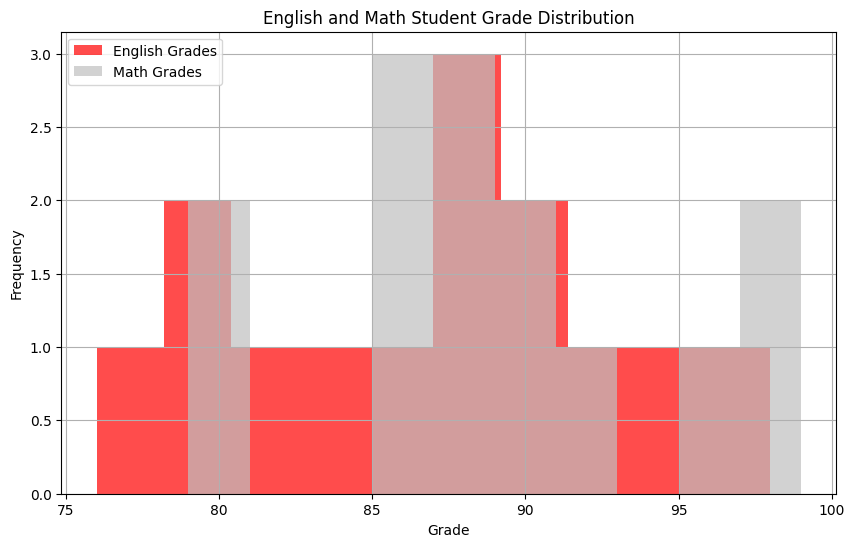

In [33]:
# Let's use matplotlib to display a histogram of the grades distribution
# Histograms are useful for seeing the distribution of the students grades

# Step 1: Use the line above as reference to create a histogram for the math grades
# (1 mark)
# The code for this step is located below

# Step 2: Ensure that your plot is descriptive, so use labels (x and y axis), a title, and a legend.
# Hint: Use the matplotlib .legend(loc='<location>') to add and place the legend.
# You can use 'upper left', 'upper right', 'lower left', and 'lower right' to specify the location.
# (4 marks)
# The code for this step is located below

# Step 3: Use the .savefig('<image_title>'.png) to output an image file of the histogram.
# Please be sure to use a descriptive title!
# (1 mark)
# The code for this step is located below

plt.figure(figsize=(10, 6))
plt.hist(df_studentGrades['englishGrade'], bins=10, alpha=0.7, label='English Grades', color='red')
plt.hist(df_studentGrades['mathGrade'], bins=10, alpha=0.7, label='Math Grades', color='silver')

plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.title('English and Math Student Grade Distribution')
plt.legend(loc='upper left')


plt.grid(True)
plt.savefig('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/English and Math Grades Distribution Histogram.png')

plt.show()

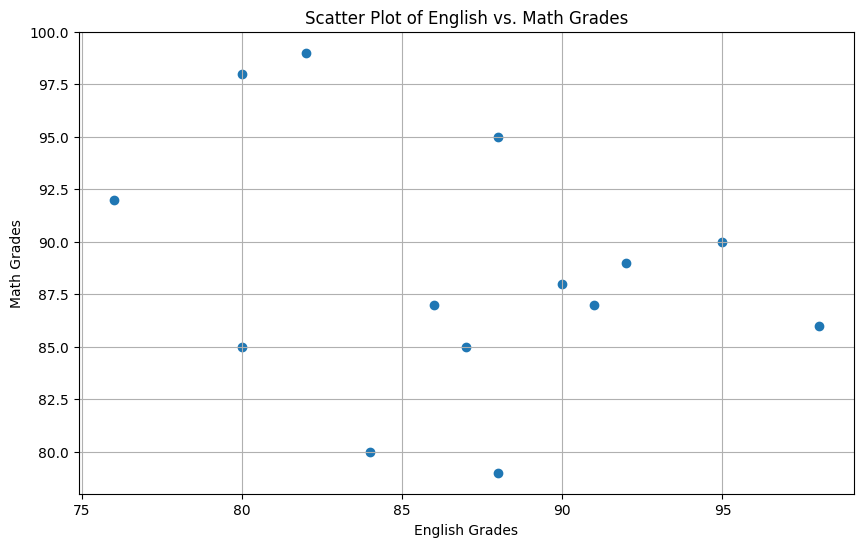

In [34]:
# Let's also use matplotlib to display a scatter plot of English vs. Math grades
# Scatter plots are useful for seeing the relationship between two variables
plt.figure(figsize=(10, 6))

# Step 1: Use .scatter(x_data, y_data) to create a scatter plot using the English grades on the x-axis, and Math grades on the y-axis
# (2 mark)

plt.scatter(df_studentGrades['englishGrade'],df_studentGrades['mathGrade'])

# Step 1: Properly label the x and y axes as well as the title of your plot.
# (3 marks)

plt.xlabel('English Grades')
plt.ylabel('Math Grades')
plt.title('Scatter Plot of English vs. Math Grades')

plt.grid(True)

# Step 2: Output an image file for the scatter plot with a descriptive file name
# (1 mark)

plt.savefig('/content/drive/MyDrive/engg680_2024_fall/Lab_Assignment1/Scatter Plot of English vs. Math Grades.png')

plt.show()

In [35]:
# From the scatter plot, is there a relationship between the Math and English grades?
# (1 mark)
# It appears that students tend to maintain a higher grade (grade above 90) in English OR in Math,
# but uncommon to have a grade above 90 in both.